# How to use preprocess functions

## `full_feature_matrix.py`

`full_feature_matrix.py` contains function named `create_full_feature_and_target_matrix()` that loops `featureMatrix()`-function and this way creates feature- and target matrixes from given data. After that, the data is going to be pushed into **database** if `pushToDatabase` is set **`True`** . Else it creates just dataframes and returns them.

### Import

In [1]:
from Preprocess.full_feature_matrix import create_full_feature_and_target_matrix

**`help`-function shows you how to use the function and which parameters you can change:**
```python
help(create_full_feature_and_target_matrix)
```

**Default parameters of matrix creation:**
```python
def create_full_feature_and_target_matrix(fullpathToPairsCsv="/raute_data/Raute/JsonForSchoolProjectTest/VerifiedPairs.csv",
                                       pathToPeelJson='/raute_data/Raute/JsonForSchoolProjectTest/NewPeel/',
                                       pathToDryJson='/raute_data/Raute/JsonForSchoolProjectTest/NewDry/',
                                       printProgress=False,
                                       pushToDatabase=True,
                                       host = '172.17.0.2',
                                       user = 'root',
                                       password = 'team1',
                                       database = 'Projekti',
                                       port = 3306,
                                       chunksize=10,
                                       featuresTableName=None,
                                       targetTableName=None,
                                       combinedTableName='PreprocessedData2',
                                       unique = True):
    
```

## 1. Use Case: Feature matrix to dataframe 
If you want feature matrix to dataframe, use following code:

In [3]:
X, Y = create_full_feature_and_target_matrix(fullpathToPairsCsv="/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/VerifiedPairs.csv",
                                             pathToPeelJson='/home/jovyan/work/raute_data/NewPeel/',
                                             pathToDryJson='/home/jovyan/work/raute_data/NewDry/',
                                             printProgress=True,
                                             pushToDatabase=False)

In [4]:
print(X.shape)
print(Y.shape)

(137, 87)
(137, 3)


In [5]:
X.head(3)

,peelFile,m_uWidth,m_uLength,m_dThickness,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,...,B9TemperatureAvg,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryMoisturePercentage,traindevtest
0,20210505123334_85.datx,1750.23265,1599.76152,1.56,113.903722,33.013574,997.511787,125.39330,11,26.9537,...,33.852578,1028.177020,157.62055,19,39.25865,2,16.99255,2,8.063503,1
1,20210505150804_9.datx,1750.23265,1599.18000,1.56,100.958000,34.138437,960.649786,0.00000,0,0.0000,...,34.420791,956.783924,12.89090,1,0.00000,0,7.03140,1,1.762412,3
2,20210505125941_29.datx,1750.23265,1601.50608,1.56,87.856679,35.469453,826.694515,21.68015,2,0.0000,...,35.587531,831.718097,49.21980,3,0.00000,0,16.40660,4,0.619572,1


In [6]:
Y.head(3)

,dryFile,dryWidth,dryShrinkage
0,20210505172657_52.datx,1633.089727,0.933070
1,20210505155509_66.datx,1609.685322,0.919698
2,20210505172211_90.datx,1614.120061,0.922232


## 2. Use Case: Feature matrix to database (recommended use)
If you want preprocessed data to straight to the database use following code:

**Example:**
```python
create_full_feature_and_target_matrix(fullpathToPairsCsv = "/raute_data/Raute/JsonForSchoolProjectTest/VerifiedPairs.csv",
                                       pathToPeelJson = '/raute_data/Raute/JsonForSchoolProjectTest/NewPeel/',
                                       pathToDryJson = '/raute_data/Raute/JsonForSchoolProjectTest/NewDry/',
                                       printProgress = False,
                                       pushToDatabase = True,
                                       host = '172.17.0.2',
                                       user = 'root',
                                       password = 'team1',
                                       database = 'Projekti',
                                       port = 3306,
                                       chunksize = 10000,
                                       featuresTableName = None,
                                       targetTableName = None,
                                       combinedTableName = 'PreprocessedData',
                                       unique = True)
```

### Parameters:

- **fullpathToPairsCsv** = string, DEFAULT = "/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/VerifiedPairs.csv"
- **pathToPeelJson** = string, DEFAULT = '/home/jovyan/work/raute_data/NewPeel/'
- **pathToDryJson** = string, DEFAULT = '/home/jovyan/work/raute_data/NewDry/'
- **printProgress** = bool, if True prints how manieth file is being processed of total
- **pushToDatabase**= bool, if True (DEFAULT) data is pushed to database and nothing is returned, if False full feature and target matrixes are returned
- **chunksize** = int or None, if None data is pushed as a whole to database, otherwise in desired chunksizes
- **featuresTableName**=None or string
- **targetTableName**=None or string, if both featuresTableName and targetTableName has a name, seperate tables will be created for them to database
- **combinedTableName**=string or None (default='PreprocesseddData') if not None, combined table will be created which has both features and target at the same table
- **host** = MariaDB container IP
- **user** = username to your container
- **password** = password to your MariaDB
- **database** = Database name where you want to push the data
- **port** = Port number of your container
- **unique** = If you want to make new tables which dont allow duplicate values then give this True. If unique = True, function will make new tables which wont allow duplicate values. If you have called this once and want to add more data to that specific table, then pass unique = False so it doesn't try to make a new table.

**Notes:**
- Also if chunksize > amount of data, function pushes all data at once
- Make sure that the paths are defined correctly
- Pushing to database requires direct access to database (SSH-connection IS NOT implemented yet)

# `feature_matrix.py`

Function `featureMatrix()` creates feature matrix of the **given JSON-file**. If necessary, it's also possible to plot all blocks on the image or just a single block to make sure that the function works properly and view what kind of sheet it is. 

*This function is dependent by `coordinates.py`, `createColumns.py`, `densitychecker.py`, `readjson.py` and `extractimage.py`.*

**With `help`-function you can view how to use the function and which parameters you can change:**
```python 
help(featureMatrix)
```

**Default parameters:**
```python
def featureMatrix(dataPath="/home/jovyan/work/raute_data/NewDry/20210505151241_35.json",
                  blockplot=False,
                  datxPath="/home/jovyan/work/data/nfs_shared_data/Raute/ai-2021h2-data/rawdata/3-Sorvi/koivu/testRun20210505",
                  prints=False):
```

### Parameters
- **dataPath :**
    - Path to the JSON-file 
    - Example: '/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/Peel/20210505123334_85.json'

- **blockplot :**
    - Plots all blocks or only one selected block on the sheet's image.
    - Default : False
    - "All" : Plots all nine blocks on image.
    - (1-9) : Plots block of given number.

- **datxPath :**
    - The path to the folder that contains the images that will be extracted for plot
    - Default : /home/jovyan/work/data/nfs_shared_data/Raute/ai-2021h2-data/rawdata/3-Sorvi/koivu/testRun20210505

- **prints :** 
    - If True, function prints it's progress e.q. filename. Mainly for debugging.
    - Default : False

### Import function

In [7]:
from Preprocess.feature_matrix import featureMatrix

### Call function and plot choosen block:
*The function can retrieve its own image for that sheet*


Plotting block 1...



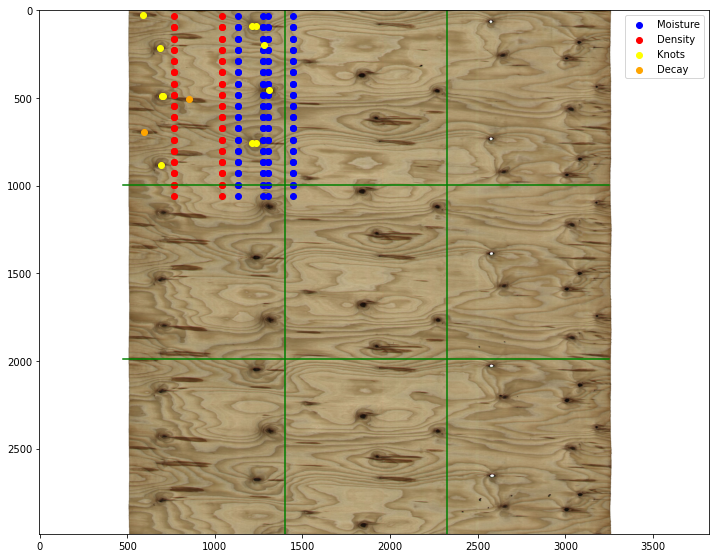

In [7]:
features=featureMatrix('/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/Peel/20210505123334_85.json',1)

### Plot all blocks:


Plotting All...

Done in 1.76 seconds


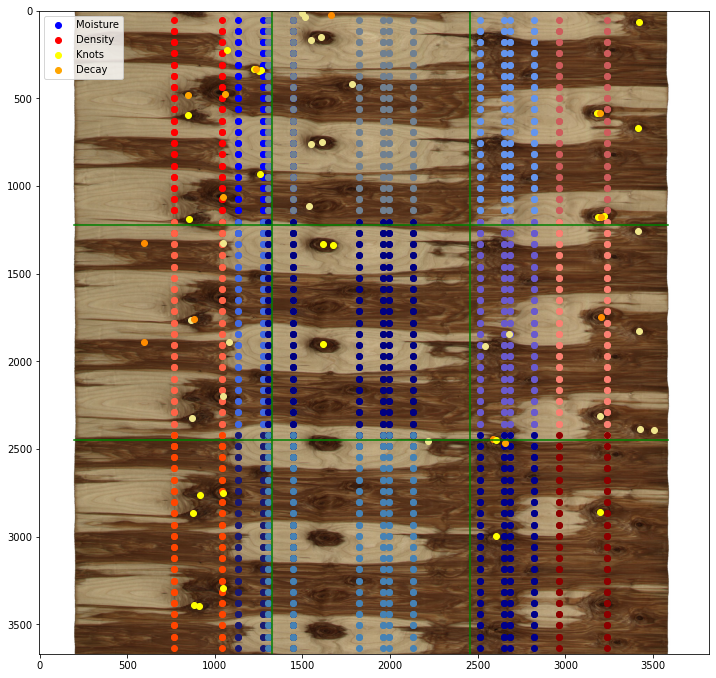

In [9]:
features = featureMatrix('/home/jovyan/work/raute_data/NewPeel/20210505121149_13.json',"All")

In [10]:
features

,peelFile,m_uWidth,m_uLength,m_dThickness,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,...,B8AllOtherDefectCount,B9MoistureAvg,B9TemperatureAvg,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount
0,20210505121149_13.datx,2149.85055,1968.4452,1.56,107.973017,35.542163,955.635018,53.32145,7,78.5173,...,3,113.550969,35.728775,973.620862,9.3752,3,18.16445,1,389.0708,1
